<a href="https://colab.research.google.com/github/sweetcider/complingv/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9B%D0%B5%D0%BC%D0%BC%D0%B0%D1%82%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B8_%D0%BC%D0%BE%D1%80%D1%84%D0%BE%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%22_%D1%87%D0%B0%D1%81%D1%82%D1%8C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лемматизация и морфологический анализ






#### Чистим от стоп-слов

Можно загрузить и свои стоп-слова, но проще всего взять из того же NLTK. Там есть наборы стоп-слов для разных языков.

In [ ]:
download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = stopwords.words('russian')
file_as_words_list_with_nltk_clean = [word for word in file_as_words_list_with_nltk_no_punct if word not in stop_words]

In [ ]:
Counter(file_as_words_list_with_nltk_clean).most_common(50)

[('это', 1099),
 ('всё', 871),
 ('Он', 686),
 ('А', 672),
 ('Я', 590),
 ('Раскольников', 565),
 ('Да', 537),
 ('И', 430),
 ('очень', 364),
 ('Ну', 363),
 ('Но', 347),
 ('Это', 287),
 ('Соня', 267),
 ('Не', 246),
 ('Разумихин', 244),
 ('человек', 238),
 ('В', 212),
 ('Петрович', 208),
 ('Что', 205),
 ('время', 203),
 ('Она', 201),
 ('тебе', 200),
 ('дело', 185),
 ('тотчас', 181),
 ('минуту', 177),
 ('Ивановна', 175),
 ('Вот', 165),
 ('сказал', 164),
 ('Вы', 164),
 ('мог', 163),
 ('сказать', 155),
 ('стал', 149),
 ('Так', 147),
 ('кажется', 145),
 ('Нет', 144),
 ('что-то', 143),
 ('Свидригайлов', 142),
 ('как-то', 139),
 ('Ведь', 139),
 ('точно', 138),
 ('Дуня', 138),
 ('знаю', 132),
 ('Порфирий', 132),
 ('стало', 131),
 ('Раскольникова', 128),
 ('прямо', 127),
 ('Катерина', 127),
 ('Как', 126),
 ('несколько', 124),
 ('Петр', 120)]

# Нормализация морфологии, лемматизация и морфоанализ в питоне <a name="practice"></a>

###  Стемминг в Python

Самый простой способ автоматический нормализации слов в языках с морфологией — стемминг. Стемминг — это очень грубое разбиение формы на предполагаемую основу и предполагаемую флексию. Программы-стеммеры умеют превращать фразу "students coded" в "student code", 'Маша поехала за грибами' в 'Маш поехал за гриб', а 'Ваня работает' в "Ван работа"

Как можно догадаться из этих примеров, стемминг — не лучшее (и крайне непопулярное) решение для флективных языков типа русского. Он лучше подходит для английского. Тем не менее...

### В том же NLTK есть готовая реализация стеммера для русского языка. Давайте потестируем ее!

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian") # в эту переменную мы положим уже готовый объект-стеммер для русского

In [ ]:
## что выдаст?
stemmer.stem('университетами')

'университет'

In [ ]:
stemmer.stem('мышам')

'мыш'

In [ ]:
stemmer.stem('конями')

'кон'

In [ ]:
stemmer.stem('людей')

'люд'

In [ ]:
## стеммер не умеет сам токенизировать -- он работает только с отдельными словами.
## поэтому надо идти по словам циклом
## можно снова сделать это при помощи list comprehensions:
text_stemmed = [stemmer.stem(word) for word in file_as_words_list_with_nltk_clean[:1000]]
text_stemmed[:20]

['преступлен',
 'наказан',
 'рома',
 'шест',
 'част',
 'эпилог',
 'част',
 'перв',
 'I',
 'в',
 'начал',
 'июл',
 'чрезвычайн',
 'жарк',
 'врем',
 'вечер',
 'молод',
 'человек',
 'вышел',
 'сво']

Но вообще стеммеры обычно применяются для английского с его небогатой морфологией и частым тождеством голой основы -- и нач.формы

In [ ]:

## Английский пример.
en_stemmer = SnowballStemmer("english")
string = 'I loved teaching students'
tostem = string.split()
for word in tostem:
    print(en_stemmer.stem(word))

i
love
teach
student


⛳ 💻 Задание: попробуйте прогнать любой текст длиной не менее 100 слов через стеммер.

In [ ]:
# ваш код здесь
string = 'Степь была полна сурками, конями и лошадьми, они скакали и кувыркались'
[stemmer.stem(word) for word in word_tokenize(string)]

['степ',
 'был',
 'полн',
 'сурк',
 ',',
 'кон',
 'и',
 'лошадьм',
 ',',
 'он',
 'скака',
 'и',
 'кувырка']

### Лемматизация в Python

Лемматизация — более традиционный для русского языка вариант, когда слова приводятся к начальной (словарной) форме. Т.е.  "Ваня работает" превращается в "Ваня работать". После такого преобразования мы можем (с оговорками, конечно) считать статистику для слов целиком, а не только для отдельных словоформ.

### PyMorphy2

Не самый лучший в смысле точности, но очень популярный и простой инструмент для лемматизации — pymorphy2. Это морфологический анализатор на python, который умеет:  

*   находить и возвращать словарную форму слова (*конями => конь*)
*   определять часть речи и грамматические характеристики, такие как падеж, число, род существительных/прилагательных, время глаголов и т.п. (*конями => существительное, одушевленное, множественное число, творительный падеж...*)
* ставить слово в нужную грамматическую форму (*конь +  существительное, одушевленное, множественное число, творительный падеж => конями*)

In [ ]:
## Если не установлен pymorphy2; в колабе его по умолчанию нет
!pip install pymorphy2
## можете попробовать также быструю версию pip install pymorphy2[fast], но тут возможны проблемы

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.2 MB/s 
     |████████████████████████████████| 8.2 MB 7.8 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=6a945c35b716a556d1845dba8f127f97900fdd1fc18f33f5c7d51bbb66e8e6d3
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt


In [ ]:
from pymorphy2 import MorphAnalyzer

morph = MorphAnalyzer()

In [ ]:
morph.parse('мыло')

[Parse(word='мыло', tag=OpencorporaTag('NOUN,inan,neut sing,nomn'), normal_form='мыло', score=0.3333333333333333, methods_stack=((DictionaryAnalyzer(), 'мыло', 54, 0),)),
 Parse(word='мыло', tag=OpencorporaTag('NOUN,inan,neut sing,accs'), normal_form='мыло', score=0.3333333333333333, methods_stack=((DictionaryAnalyzer(), 'мыло', 54, 3),)),
 Parse(word='мыло', tag=OpencorporaTag('VERB,impf,tran neut,sing,past,indc'), normal_form='мыть', score=0.3333333333333333, methods_stack=((DictionaryAnalyzer(), 'мыло', 2074, 9),))]

Посмотрите на эти разборы выше. Понимаете ли вы, что это за варианты?

In [ ]:
morph.parse('мыло')[1]

Parse(word='мыло', tag=OpencorporaTag('NOUN,inan,neut sing,accs'), normal_form='мыло', score=0.3333333333333333, methods_stack=((DictionaryAnalyzer(), 'мыло', 54, 3),))

In [ ]:
type(morph.parse('мыло')[2])

pymorphy2.analyzer.Parse

Посмотрим документацию

In [ ]:
morph.parse('мыло')[0].normal_form

'мыло'

[Или тут, тут понятнее](https://pymorphy2.readthedocs.io/en/stable/user/guide.html#id3)

In [ ]:
morph.parse('мыло')[1].normal_form

'мыло'

In [ ]:
parsed_horse = morph.parse('лошадям')

In [ ]:
parsed_horse[0].normal_form

'лошадь'

В отличие от леммы, набор граммем -- не простая строка, а особый объект ```OpencorporaTag``` со своим внутренним устройством

In [ ]:
type(morph.parse('мыло')[0].tag)

pymorphy2.tagset.OpencorporaTag

Посмотрим на документацию этого объекта:

In [ ]:
help(morph.parse('мыло')[0].tag)

Help on OpencorporaTag in module pymorphy2.tagset object:

class OpencorporaTag(builtins.object)
 |  OpencorporaTag(tag)
 |  
 |  Wrapper class for OpenCorpora.org tags.
 |  
 |  .. warning::
 |  
 |      In order to work properly, the class has to be globally
 |      initialized with actual grammemes (using _init_grammemes method).
 |  
 |      Pymorphy2 initializes it when loading a dictionary;
 |      it may be not a good idea to use this class directly.
 |      If possible, use ``morph_analyzer.TagClass`` instead.
 |  
 |  Example::
 |  
 |      >>> from pymorphy2 import MorphAnalyzer
 |      >>> morph = MorphAnalyzer()
 |      >>> Tag = morph.TagClass  # get an initialzed Tag class
 |      >>> tag = Tag('VERB,perf,tran plur,impr,excl')
 |      >>> tag
 |      OpencorporaTag('VERB,perf,tran plur,impr,excl')
 |  
 |  Tag instances have attributes for accessing grammemes::
 |  
 |      >>> print(tag.POS)
 |      VERB
 |      >>> print(tag.number)
 |      plur
 |      >>> print(tag.ca

Давайте попробуем глядя на эту документацию понять, как нам вытащить из тега конкретно **падеж** (граммему падежа)?

In [ ]:
morph.parse('мыло')[2].tag.case

In [ ]:
morph.parse('мыло')[2]

Parse(word='мыло', tag=OpencorporaTag('VERB,impf,tran neut,sing,past,indc'), normal_form='мыть', score=0.3333333333333333, methods_stack=((DictionaryAnalyzer(), 'мыло', 2074, 9),))

Там же в документации можно заметить метод для получения кириллической репрезентации граммем — под названием ```.cyr_repr```:

In [ ]:
morph.parse('мыло')[0].tag.cyr_repr

'СУЩ,неод,ср ед,им'

In [ ]:
morph.parse('стали')

[Parse(word='стали', tag=OpencorporaTag('VERB,perf,intr plur,past,indc'), normal_form='стать', score=0.975342, methods_stack=((DictionaryAnalyzer(), 'стали', 945, 4),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='сталь', score=0.010958, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 1),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,nomn'), normal_form='сталь', score=0.005479, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 6),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,datv'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 2),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,loct'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 5),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,accs'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 9),))]

### Окей, с отдельными словами разобрались. Пойдем лемматизировать весь наш огромный роман

Как и стеммер выше, pymorphy2 не токенизирует строку автоматически. Ему нужны уже токенизированные слова.

In [ ]:
# Так не сработает, хотя результат интересный и кое-что дает
test = 'Мы еще раз тестируем машинную морфологию'
morph.parse(test)[0]

Parse(word='мы еще раз тестируем машинную морфологию', tag=OpencorporaTag('NOUN,inan,femn sing,accs'), normal_form='мы еще раз тестируем машинную морфология', score=1.0, methods_stack=((FakeDictionary(), 'мы еще раз тестируем машинную морфологию', 41, 3), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'логию')))

In [ ]:
# А вот так сработает
for word in word_tokenize(test):
    print(morph.parse(word)[0].normal_form)
    print(morph.parse(word)[0].tag)

мы
NPRO,1per plur,nomn
ещё
ADVB
раз
NOUN,inan,masc plur,gent
тестировать
VERB,impf,tran plur,1per,pres,indc
машинный
ADJF,Qual femn,sing,accs
морфология
NOUN,inan,femn sing,accs


In [ ]:
# можно еще так — еще раз убедимся в удобстве list comprehensions
[morph.parse(word)[0].normal_form for word in word_tokenize(test)]

['мы', 'ещё', 'раз', 'тестировать', 'машинный', 'морфология']

In [ ]:
## напишем небольшой цикл для лемматизации каждого слова в списке токенов
my_tokens = word_tokenize(test)
for word in my_tokens:
    result = morph.parse(word)
    most_probable_result = result[0] ## почему мы берем первый разбор? см.в этом месте: https://pymorphy2.readthedocs.io/en/latest/user/guide.html#select-correct
    normal_form = most_probable_result.normal_form
    print(normal_form)

мы
ещё
раз
тестировать
машинный
морфология


In [ ]:
# пример, где score действительно работает и выбор варианта [0] очень осмысленный
morph.parse('забрала')

[Parse(word='забрала', tag=OpencorporaTag('VERB,perf,tran femn,sing,past,indc'), normal_form='забрать', score=0.5, methods_stack=((DictionaryAnalyzer(), 'забрала', 1349, 2),)),
 Parse(word='забрала', tag=OpencorporaTag('NOUN,inan,neut sing,gent'), normal_form='забрало', score=0.166666, methods_stack=((DictionaryAnalyzer(), 'забрала', 54, 1),)),
 Parse(word='забрала', tag=OpencorporaTag('NOUN,inan,neut plur,nomn'), normal_form='забрало', score=0.166666, methods_stack=((DictionaryAnalyzer(), 'забрала', 54, 6),)),
 Parse(word='забрала', tag=OpencorporaTag('NOUN,inan,neut plur,accs'), normal_form='забрало', score=0.166666, methods_stack=((DictionaryAnalyzer(), 'забрала', 54, 9),))]

In [ ]:
# пример, где score действительно работает и выбор варианта [0] очень осмысленный
morph.parse('стали')

[Parse(word='стали', tag=OpencorporaTag('VERB,perf,intr plur,past,indc'), normal_form='стать', score=0.975342, methods_stack=((DictionaryAnalyzer(), 'стали', 945, 4),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='сталь', score=0.010958, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 1),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,nomn'), normal_form='сталь', score=0.005479, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 6),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,datv'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 2),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,loct'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 5),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,accs'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 9),))]

⛳ 💻  Задание: сделать лемматизацию 100 первых слов "Преступления и наказания" с помощью PyMophy2, напечатать их.

Т.к. выше мы уже токенизировали текст романа и сложили результат в виде списка слов в переменную ```file_as_words_list_with_nltk_clean```, можно просто пройтись по словам в этом списке и применить к ним анализатор PyMorphy2.

In [ ]:
my_tokens = word_tokenize(str(file_as_words_list_with_nltk_clean))
for word in my_tokens:
    result = morph.parse(word)
    most_probable_result = result[0]
    normal_form = most_probable_result.normal_form
    print(normal_form)

Выходные данные были обрезаны до нескольких последних строк (5000).
,
'истязание
'
,
'напротив
'
,
'рада
'
,
'работа
'
,
'измучиться
'
,
'работа
'
,
'физически
'
,
'крайний
'
,
'мера
'
,
'добывать
'
,
'несколько
'
,
'часы
'
,
'спокойный
'
,
'сон
'
,
'
и
'
,
'значить
'
,
'пища
'
,
'пустой
'
,
'щи
'
,
'таракан
'
,
'студент
'
,
'время
'
,
'прежний
'
,
'жизнь
'
,
'часто
'
,
'иметь
'
,
'платье
'
,
'тепло
'
,
'приспособить
'
,
'образ
'
,
'жизнь
'
,
'кандалы
'
,
'чувствовать
'
,
'стыдиться
'
,
'своя
'
,
'бритый
'
,
'голов
'
,
'половинчатый
'
,
'куртка
'
,
'но
'
,
'пред
'
,
'кать
'
,
'пред
'
,
'соня
'
,
'соня
'
,
'бояться
'
,
'пред
'
,
'нея
'
,
'стыдиться
'
,
'
а
'
,
'он
'
,
'стыдиться
'
,
'пред
'
,
'соня
'
,
'которовать
'
,
'мучить
'
,
'этый
'
,
'своить
'
,
'презрительный
'
,
'грубый
'
,
'обращение
'
,
'но
'
,
'бритый
'
,
'голов
'
,
'кандалы
'
,
'стыдиться
'
,
'гордость
'
,
'сильно
'
,
'уязвить
'
,
'заболеть
'
,
'уязвить
'
,
'гордость
'
,
'
о
'
,
'счастливый
'
,
'мочь
'
,
'обвинить
'
,
'он
'


⛳ 💻  Теперь давайте попробуем получить **100 самых частотных слов**. Это будет посложнее: нам явно нужно лемматизировать весь роман, потом куда-то сложить слова, а потом — посчитать самые частотные.

In [ ]:
# ваш код
words_lemmatized = [morph.parse(word)[0].normal_form for word in file_as_words_list_with_nltk_clean]
Counter(words_lemmatized).most_common(100)


[('это', 1438),
 ('всё', 1002),
 ('он', 830),
 ('я', 706),
 ('а', 672),
 ('знать', 619),
 ('раскольник', 567),
 ('один', 563),
 ('свой', 540),
 ('да', 537),
 ('сказать', 537),
 ('говорить', 528),
 ('человек', 489),
 ('мочь', 472),
 ('весь', 454),
 ('сам', 446),
 ('стать', 441),
 ('и', 430),
 ('который', 429),
 ('очень', 382),
 ('такой', 379),
 ('соня', 376),
 ('петрович', 368),
 ('рука', 363),
 ('ну', 363),
 ('дело', 353),
 ('разумихин', 353),
 ('но', 347),
 ('ты', 341),
 ('иванович', 338),
 ('хотеть', 336),
 ('тот', 321),
 ('что', 278),
 ('минута', 277),
 ('видеть', 274),
 ('ваш', 273),
 ('она', 271),
 ('смотреть', 262),
 ('время', 260),
 ('какой-то', 259),
 ('пойти', 259),
 ('вы', 251),
 ('не', 246),
 ('этот', 240),
 ('слово', 237),
 ('думать', 232),
 ('лицо', 231),
 ('глаз', 229),
 ('в', 228),
 ('самый', 225),
 ('казаться', 224),
 ('дверь', 223),
 ('катерина', 221),
 ('комната', 210),
 ('голова', 210),
 ('прийти', 207),
 ('мой', 206),
 ('свидригайлов', 206),
 ('порфирий', 204),
 ('д

### Теперь давайте сделаем то, ради чего мы все затеяли, — построим таки список частотных слов

In [ ]:
word_freqs_lemmatized = Counter(words_lemmatized)
word_freqs_lemmatized.most_common(100)

[('это', 1438),
 ('всё', 1002),
 ('он', 830),
 ('я', 706),
 ('а', 672),
 ('знать', 619),
 ('раскольник', 567),
 ('один', 563),
 ('свой', 540),
 ('да', 537),
 ('сказать', 537),
 ('говорить', 528),
 ('человек', 489),
 ('мочь', 472),
 ('весь', 454),
 ('сам', 446),
 ('стать', 441),
 ('и', 430),
 ('который', 429),
 ('очень', 382),
 ('такой', 379),
 ('соня', 376),
 ('петрович', 368),
 ('рука', 363),
 ('ну', 363),
 ('дело', 353),
 ('разумихин', 353),
 ('но', 347),
 ('ты', 341),
 ('иванович', 338),
 ('хотеть', 336),
 ('тот', 321),
 ('что', 278),
 ('минута', 277),
 ('видеть', 274),
 ('ваш', 273),
 ('она', 271),
 ('смотреть', 262),
 ('время', 260),
 ('какой-то', 259),
 ('пойти', 259),
 ('вы', 251),
 ('не', 246),
 ('этот', 240),
 ('слово', 237),
 ('думать', 232),
 ('лицо', 231),
 ('глаз', 229),
 ('в', 228),
 ('самый', 225),
 ('казаться', 224),
 ('дверь', 223),
 ('катерина', 221),
 ('комната', 210),
 ('голова', 210),
 ('прийти', 207),
 ('мой', 206),
 ('свидригайлов', 206),
 ('порфирий', 204),
 ('д

Ну и нарисуем график (про код ниже можно не думать, матплотлиб мы еще не проходили):

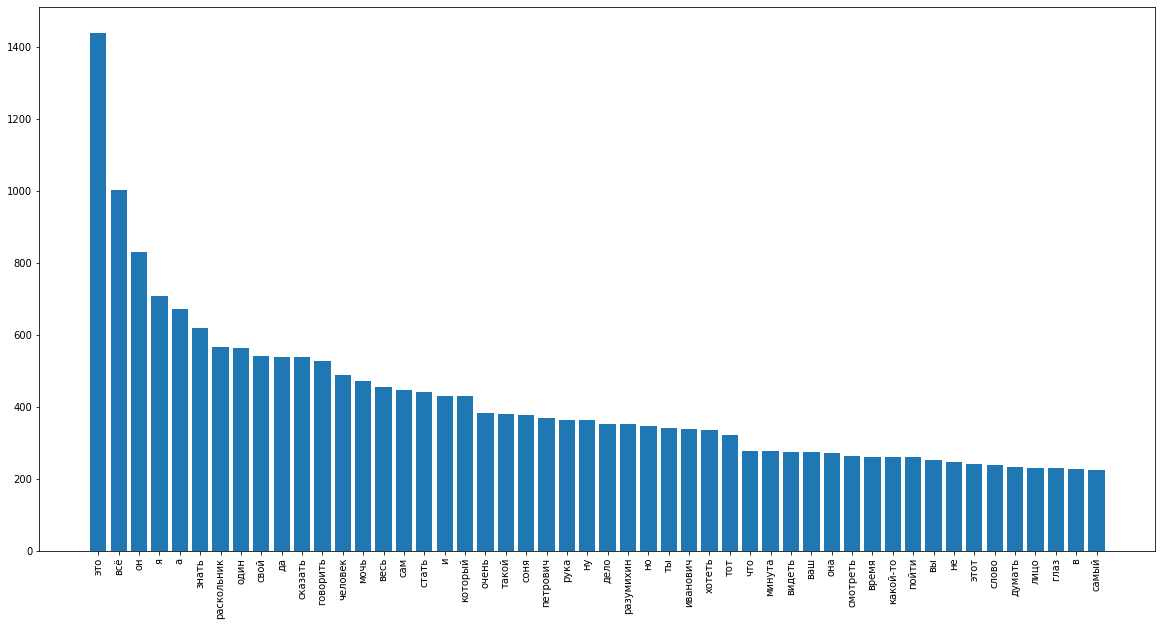

In [ ]:
import matplotlib.pyplot as plt # импортируем pyplot из матплотлиб

values = [pair[1] for pair in word_freqs_lemmatized.most_common(50)] # создаем список с циферками частотностей
labels = [pair[0] for pair in word_freqs_lemmatized.most_common(50)] # создаем список со словами в том же порядке


## тут просто всякие параметры отрисовки
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.bar(labels, values) # запихиваем данные в отрисовщик барчартов
plt.show()
plt.close('all')

# Распределение слов по тексту

Когда вы научились лемматизировать, можно подойти ближе к чему-то более похожему на distant reading. Например, распределение каких-то значимых для нас слов по тексту.   

В питоне можно придумать разные способы делать это, но один из самых простых — с помощью готового инструмента (вернее, метода) dispersion_plot в уже упомянутой прекрасной библиотеке NLTK. Из NLTK понадобится импортировать [модуль Text](https://www.nltk.org/api/nltk.html#module-nltk.text), чтобы превратить наш список токенов в специальный NLTK-шный тип данных "nltk Text", к которому применим метод dispersion_plot:

In [ ]:
from nltk import Text as nltk_text
words_lemmatized_nltk_format = nltk_text(words_lemmatized)
type(words_lemmatized_nltk_format)

nltk.text.Text

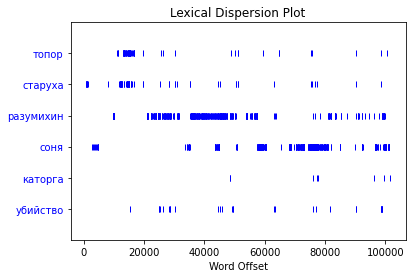

In [ ]:
words_lemmatized_nltk_format.dispersion_plot(["топор", "старуха","разумихин", "соня", "каторга", "убийство"])